In [22]:
# modules importation
from trends_functions import *
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

In [23]:
# import seaborn style
sns.set()
sns.set_context("paper")
# sns.set_style("whitegrid")
sns.color_palette("muted")
# since each figure will be a subfigure, increase font_size
fscale = 1.2
sns.set(font_scale=fscale)

period = '2000-2014'
all_mods = list(get_all_mods().keys())

#### open the dataframes

##### start with rslp

In [24]:
#check all the files in 'cache/rsl'
pkls = []
# r=root, d=directories, f = files
for r, d, f in os.walk('cache/rslp'):
    for pkl in f:
        pkls.append(os.path.join(r, pkl))

#read all df and concatenate them
df_pkls = []
for pkl in pkls:
    print('read ', pkl)
    # for reading also binary mode is important 
    pklfile = open(pkl, 'rb')      
    df_pkl = pickle.load(pklfile) 
    pklfile.close()
    df_pkls.append(df_pkl)
    
RSLP = pd.concat(df_pkls)

#exclude some models
ok_mods = all_mods[:]
#ok_mods.remove('NorESM2-CPL_HIST')

read  cache/rslp/concpm25.pkl
read  cache/rslp/concso4.pkl
read  cache/rslp/ang4487aer.pkl
read  cache/rslp/od550aer.pkl
read  cache/rslp/concpm10.pkl
read  cache/rslp/scatc550dryaer.pkl
read  cache/rslp/absc550aer.pkl
read  cache/rslp/od550gt1aer.pkl
read  cache/rslp/od550lt1aer.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [25]:
RSLP.keys()

Index(['BCC-CUACE_AP3-HIST', 'CESM2_historical', 'CanESM5_historical',
       'ECHAM6.3-HAM2.3-fSST_HIST', 'ECMWF_CAMS_REAN', 'GEOS-i33p2_HIST',
       'GFDL-AM4-amip_HIST', 'IPSL-CM6A-LR_historical',
       'MIROC-SPRINTARS_AP3-HIST', 'NorESM2-CPL-NEWTEST_HIST', 'OBS',
       'OsloCTM3v1.01-met2010_AP3-HIST',
       'OsloCTM3v1.01b-met1990-2017_AP3-HIST'],
      dtype='object')

In [26]:
#reorder columns: firts obs, then models
cols = ['OBS']
cols.extend(ok_mods)
RSLP = RSLP[cols]

##### then with pvalues

In [27]:
#check all the files in 'cache/rsl'
pkls = []
# r=root, d=directories, f = files
for r, d, f in os.walk('cache/pval'):
    for pkl in f:
        pkls.append(os.path.join(r, pkl))

#read all df and concatenate them
df_pkls = []
for pkl in pkls:
    print('read ', pkl)
    # for reading also binary mode is important 
    pklfile = open(pkl, 'rb')      
    df_pkl = pickle.load(pklfile) 
    pklfile.close()
    df_pkls.append(df_pkl)
    
PVAL = pd.concat(df_pkls)

#exclude some models
ok_mods = all_mods[:]
#ok_mods.remove('NorESM2-CPL_HIST')

#reorder columns: firts obs, then models
cols = ['OBS']
cols.extend(ok_mods)
PVAL = PVAL[cols]

read  cache/pval/concpm25.pkl
read  cache/pval/concso4.pkl
read  cache/pval/ang4487aer.pkl
read  cache/pval/od550aer.pkl
read  cache/pval/concpm10.pkl
read  cache/pval/scatc550dryaer.pkl
read  cache/pval/absc550aer.pkl
read  cache/pval/od550gt1aer.pkl
read  cache/pval/od550lt1aer.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



#### representativity

In [28]:
#check all the files in 'cache/rsl'
pkls = []
# r=root, d=directories, f = files
for r, d, f in os.walk('cache/repr'):
    for pkl in f:
        pkls.append(os.path.join(r, pkl))

#read all df and concatenate them
df_pkls = []
for pkl in pkls:
    print('read ', pkl)
    # for reading also binary mode is important 
    pklfile = open(pkl, 'rb')      
    df_pkl = pickle.load(pklfile) 
    pklfile.close()
    df_pkls.append(df_pkl)
    
REPR = pd.concat(df_pkls)

read  cache/repr/concpm25.pkl
read  cache/repr/concso4.pkl
read  cache/repr/ang4487aer.pkl
read  cache/repr/od550aer.pkl
read  cache/repr/concpm10.pkl
read  cache/repr/scatc550dryaer.pkl
read  cache/repr/absc550aer.pkl
read  cache/repr/od550gt1aer.pkl
read  cache/repr/od550lt1aer.pkl


#### and errors

In [29]:
#check all the files in 'cache/rsl'
pkls = []
# r=root, d=directories, f = files
for r, d, f in os.walk('cache/err'):
    for pkl in f:
        pkls.append(os.path.join(r, pkl))

#read all df and concatenate them
df_pkls = []
for pkl in pkls:
    print('read ', pkl)
    # for reading also binary mode is important 
    pklfile = open(pkl, 'rb')      
    df_pkl = pickle.load(pklfile) 
    pklfile.close()
    df_pkls.append(df_pkl)
    
ERR = pd.concat(df_pkls)

read  cache/err/concpm25.pkl
read  cache/err/concso4.pkl
read  cache/err/ang4487aer.pkl
read  cache/err/od550aer.pkl
read  cache/err/concpm10.pkl
read  cache/err/scatc550dryaer.pkl
read  cache/err/absc550aer.pkl
read  cache/err/od550gt1aer.pkl
read  cache/err/od550lt1aer.pkl


/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



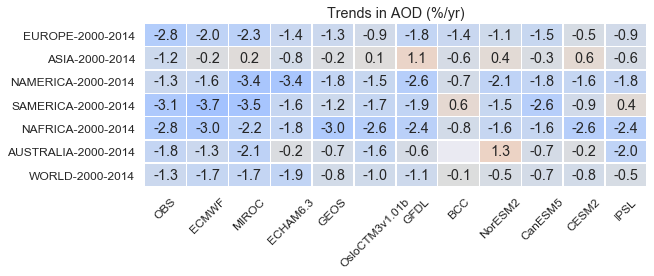

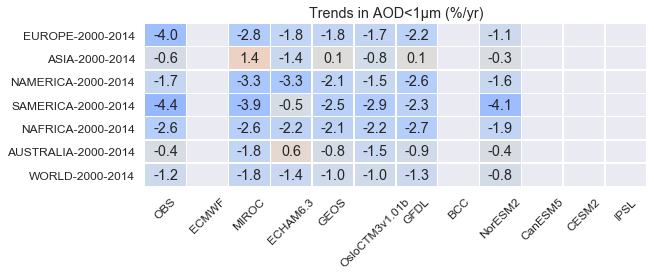

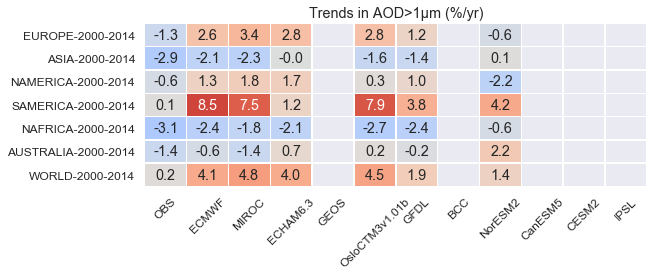

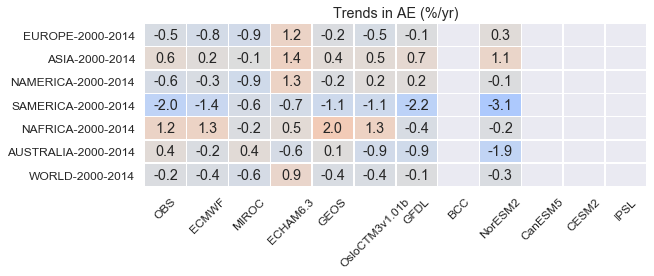

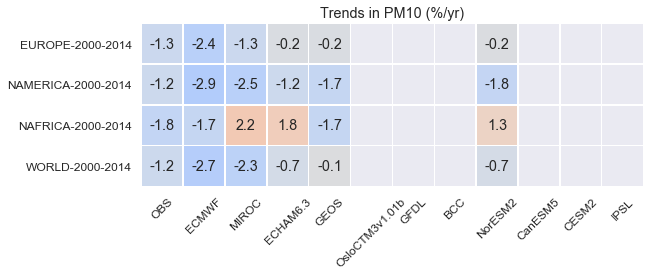

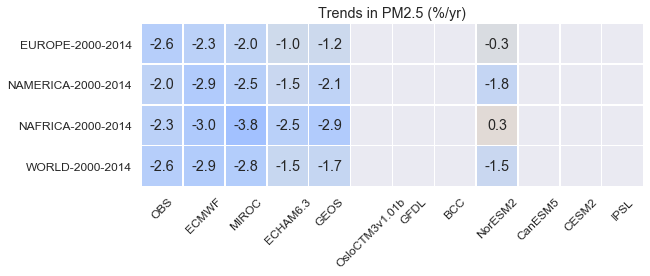

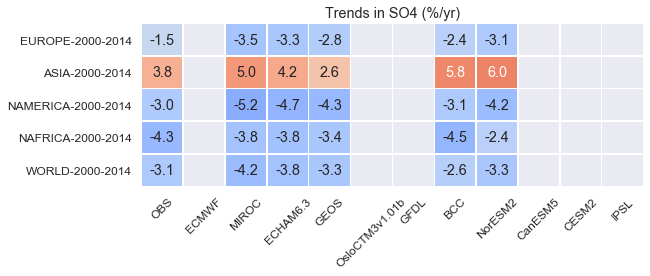

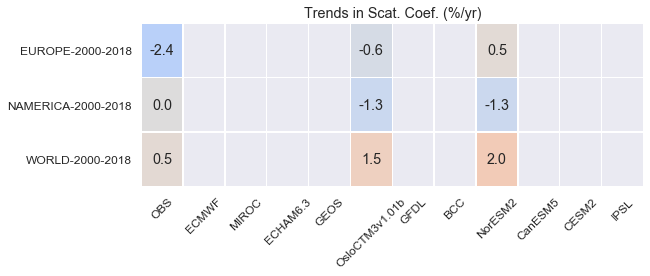

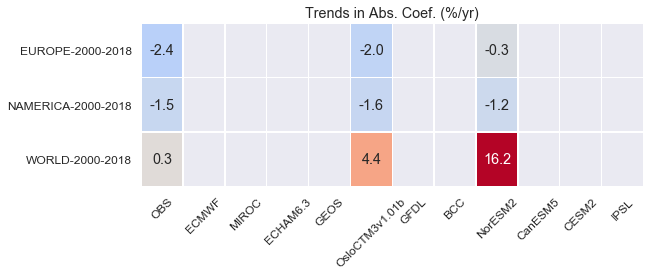

In [30]:
parameters = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM10', 'PM2.5', 'SO4', 'Scat. Coef.', 'Abs. Coef.']

for parameter in parameters:
    df = RSLP[RSLP.index.get_level_values(0)==parameter]
    #remove Paramneter from multiIndex
    df = df.droplevel(level=0)
    #generate a heatmap
    plt.figure(figsize=(9,3))

    hm = sns.heatmap(df, vmin=-10, vmax=10, center=0, cmap='coolwarm', 
                annot=True, fmt=".1f", linewidth=0.5, cbar=False,
                square=False
               )
    plt.title('Trends in '+parameter+' (%/yr)')
    
    #fix xlabels
    xlabs = hm.get_xticklabels()
    for i, xlab in enumerate(xlabs):
        xl = xlab.get_text()
        xl = xl.split('_')[0]
        xl = xl.split('-')[0]
        xlabs[i].set_text(xl)
    hm.set_xticklabels(xlabs, rotation = 45, fontsize = 12)
    
    #fix ylabels: remove the region in second line
    ylabs = hm.get_yticklabels()
    for i, ylab in enumerate(ylabs):
        yl = ylab.get_text()
        reg = yl.split('-')[0]
        if i>0 and reg == prev_reg:
            yl = yl.split('-')[1]+'-'+yl.split('-')[2]
        prev_reg = reg
        ylabs[i].set_text(yl)
    hm.set_yticklabels(ylabs, rotation = 0, fontsize = 12)
    
    #remove ylabel
    hm.set_ylabel('')

In [31]:
def pval2size(pv):
    if np.isnan(pv):
        size = 0
    else:
        if pv<=0.05:
            size = 8
        if pv>0.05 and pv<=0.1:
            size = 7
        if pv>0.1 and pv<=0.2:
            size = 5
        if pv>0.2 and pv<=0.3:
            size = 3
        if pv>0.3:
            size = 2
    return size

In [32]:
def heatmap(x, y, **kwargs):
    period = '2000-2014'
    p1 = period.split('-')[0]
    y_copy = y
    if 'group_segments' in kwargs:
        #if segment is present in y, need to use the default time period
        y2, dx, ds = [], [], []
        #if segment is present in y, need to use the default time period
        for i, y in enumerate(y):
            if period not in y:
                y2.append(y.split('-')[0]+'-'+period)
                if y.split('-')[-2] == p1:
                    dx.append(0)
                else:
                    dx.append(0)
                ds.append(1)
            else:
                y2.append(y)
                dx.append(0)
            ds.append(1)
        y = y2
        size = kwargs['size']
    else:
        size = kwargs['size']
    
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation
        

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            if val!=0:
                #makes the colors symetric around 0
                if ind>=(n_colors-1)/2:
                    ind = min(ind+1, len(palette)-1)
                return palette[ind]
            else:
                return 'lightgray'

    if 'size' in kwargs:
        #size = kwargs['size']
        size = size
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    
    if 'group_segments' in kwargs:
        y_names = [y_name if period in y_name else y_name.split('-')[0]+'-'+period for y_name in y_names]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    #make sure index ar following
    keys = list(y_to_num.keys())
    for i, _ in enumerate(y_to_num):
        y_to_num[keys[i]] = i
    
    #new figure
    plt.figure(figsize=(9,3))
    
    plot_grid = plt.GridSpec(1, 14+3, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-3]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'group_segments','color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 
         'x_order', 'y_order', 'annotate', 'fontsize', 'colorbar', 'title', 'merge_ylabels', 'x_ylabels',
         'break_year', 'obs', 'repres'
    ]}
    
    #if obs: plot null only of pixel is empty
    if 'obs' in kwargs and kwargs['obs']:
        #creates dicitonnary with keys: region and parameter and counts all elements
        MAT = {}
        ps=[value_to_size(v)*ds[i] for v in size]
        pc=[value_to_color(v) for v in color]
        for i, _ in enumerate(ps):
            if x[i] not in MAT:
                MAT[x[i]] = {}
            if y[i] not in MAT[x[i]]:
                MAT[x[i]][y[i]] = []
            MAT[x[i]][y[i]].append(ps[i])
            MAT[x[i]][y[i]] = [max(MAT[x[i]][y[i]])]
        
        for i, _ in enumerate(ps):
            if pc[i]=='lightgray':
                if MAT[x[i]][y[i]][0] == 5.0:
                    ps[i] = 5
                    dx[i] = 0
                else:
                    ps[i] = 0
    else:
        ps = [value_to_size(v)*ds[i] for v in size]
    
    
    if 'repres' in kwargs:
        rep = kwargs['repres']
        #loop
        edgecolors, linewidths = [], []
        for i, _ in enumerate(rep):
            if rep[i]>=50:
                edgecolors.append((0.1,0.1,0.1,1))
                linewidths.append(2)
            else:
                edgecolors.append((0.1,0.1,0.1,0))
                linewidths.append(2)
            #edgecolors.append((0.1,0.1,0.1,rep[i]/100))
            #linewidths.append(2)
    else:
        edgecolors = 'none'
        linewidths = 0
        
    ax.scatter(
        x=[x_to_num[v]+dx[i] for i, v in enumerate(x)],
        y=[y_to_num[v] for v in y],
        marker=marker,
        edgecolors=edgecolors,
        linewidths=linewidths,
        s=ps, 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    
    if kwargs['annotate']:
        for i, annotation in enumerate(color):
            if annotation!=0:
                note = '{:+3.1f}'.format(annotation)
                fc = 'black'
                fs = 10
                txt = ax.text(x_to_num[x[i]]-.025+dx[i], y_to_num[y[i]], note, fontsize=fs, zorder=10,
                       verticalalignment='center', horizontalalignment='center', color=fc)
                txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    
    if kwargs['break_year']:
        break_years = kwargs['break_year']
        for i, by in enumerate(break_years):
            plt.text(x_to_num[x[i]]-0.15,y_to_num[y[i]]-0.4,by, fontsize=8)
    
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right', fontweight='normal')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    

    # Add color legend on the right side of the plot
    if color_min < color_max:
        if kwargs['colorbar']:
            ax = plt.subplot(plot_grid[:,-1:]) # Use the rightmost column of the plot
            #plot pvalues
            vals_leg = [0.3,0.2,0.1,0.05]
            for i, pval in enumerate(vals_leg):
                ms = pval2size(pval)
                msize = ms*2.5
                plt.plot(1.0,0.8*i+0.3,'o', markersize=msize, color='black', mfc='none')
                if i==0:
                    txt = '> '+str(pval)
                else:
                    txt = '< '+str(pval)
                plt.text(2.1,0.8*i+0.2, txt, transform=ax.transData, fontsize=13)
            ax.set_ylim([-1,4])
            ax.set_xlim([0,2])
            ax.axes.get_yaxis().set_visible(False)
            ax.axes.get_xaxis().set_visible(False)
            ax.set_facecolor('white')
            plt.title('p-val',x=1.15,y=0.8)
            ax.margins(0)
            
            
            ax = plt.subplot(plot_grid[:,-3:-2]) # Use the rightmost column of the plot
            col_x = [1.5]*len(palette) # Fixed x coordinate for the bars
            bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

            bar_height = bar_y[1] - bar_y[0]
            ax.barh(
                y=bar_y,
                width=[1.5]*len(palette), # Make bars 5 units wide
                left=col_x, # Make bars start at 0
                height=bar_height,
                color=palette,
                linewidth=0
            )
            ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
            ax.grid(False) # Hide grid
            ax.set_facecolor('white') # Make background white
            ax.set_xticks([]) # Remove horizontal ticks
            ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
            ax.yaxis.tick_right() # Show vertical ticks on the right
            ax.tick_params(length=0,pad=3,grid_alpha=0,grid_zorder=0)
            plt.title('%/yr',x=1.0,y=0.8)
            ax.margins(0.4)
            plt.draw()
            #add a + sign to positive trends
            ylabs = ax.get_yticklabels()
            for i, ylab in enumerate(ylabs):
                yl = ylab.get_text()
                if yl[0]!='−' and yl[0]!='0':
                    yl='+'+yl
                ylabs[i].set_text(yl)
            ax.set_yticklabels(ylabs)
             
    if kwargs['title']:
        ax = plt.subplot(plot_grid[:,:-3]) # Use the left 14/15ths of the grid for the main plot
        plt.title(kwargs['title'])
    
    if kwargs['merge_ylabels']:
        variables = []
        heights = []
        txts = []
        y_names = list(y_to_num.keys())
        for yname in y_names:
            var = yname.split('-',1)[0]
            variables.append(var)
        variables = pd.unique(variables)
        
        #heights
        h0 = 0
        for variable in variables:
            h = h0
            for yname in y_names:
                var = yname.split('-',1)[0]
                if variable==var:
                    h+=1
            heights.append(h)
        ytxts = np.cumsum(heights)-1
        
        #work in main plot
        ax = plt.subplot(plot_grid[:,:-3]) # Use the left 14/15ths of the grid for the main plot
        
        if kwargs['x_ylabels']:
            x_ylabels = kwargs['x_ylabels']
        else:
            x_ylabels = -3
        if 'group_segments' in kwargs:
            x_ylabels = -1.75
            
        for i, h in enumerate(heights):
            props = dict(facecolor='white', alpha=0.5, clip_box=[[-2, ytxts[i]],[0, ytxts[i]-heights[i]]])
            if variables[i]=='Scat. Coef.':
               variables[i]='$\sigma_{sp}$'
            if variables[i]=='Abs. Coef.':
               variables[i]='$\sigma_{ap}$'
            if variables[i]=='SO4':
               variables[i]='$SO_{4}$'
            if variables[i]=='PM10':
               variables[i]='$PM_{10}$'
            if variables[i]=='PM2.5':
               variables[i]='$PM_{2.5}$'
            
            
            ax.text(x_ylabels,ytxts[i] - heights[i]/2 +0.4,variables[i],weight="normal", bbox=props)
            
            if 'group_segments' not in kwargs:
                xbar = np.arange(x_ylabels,0)
                ybar = ytxts[i] - heights[i] +0.5
                #plt.plot(xbar,ybar*np.ones(len(xbar)),'k',lw=1, color='gray', clip_on=False)
            else:
                xbar = np.arange(x_ylabels,0)
                ybar = ytxts[i] - heights[i] +0.5
                #plt.plot(xbar,ybar*np.ones(len(xbar)),'k',lw=1, color='gray', clip_on=False)
        
        #remove parameters from ylabels
        plt.draw()
        ylabs = ax.get_yticklabels()
        for i, ylab in enumerate(ylabs):
            yl = ylab.get_text()
            txt = yl.split('-',1)[1]
            if 'group_segments' not in kwargs:
                ylabs[i].set_text(txt)
            else:
                ylabs[i].set_text('')
        ax.set_yticklabels(ylabs, rotation = 0, fontsize = 12) 

#### heatmaps for OBS and MODS per variable

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:253: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AttributeError: 'Text' object has no property 'fontweigth'

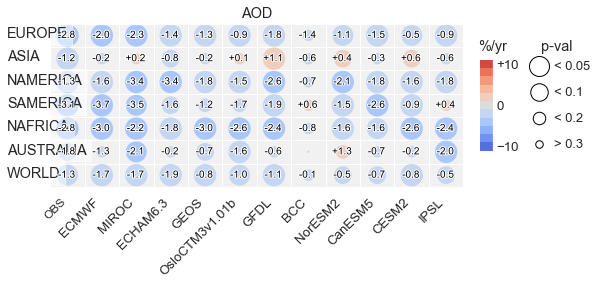

In [33]:
#parameters = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM10', 'PM2.5', 'SO4', 'Scat. Coef.', 'Abs. Coef.']

for parameter in parameters:
    rslp = RSLP[RSLP.index.get_level_values(0)==parameter]
    pval = PVAL[PVAL.index.get_level_values(0)==parameter]

    #store rows order: index
    rows = [i[1]+'-'+i[2] for i in rslp.index]

    #remove Indexes so only have columns
    rslp = rslp.reset_index()
    pval = pval.reset_index()
    
    xs, ys, rslps, pvals = [], [], [], []

    #start extracting rlsps values
    vals = rslp.values
    columns = rslp.columns
    for val in vals:
        reg = val[1]
        seg = val[2]
        data = val[3:]

        rslps.extend(data[:])
        xs.extend(columns[3:])
        ys.extend([reg+'-'+seg] * len(data))
    rslps = np.array(rslps)

    #then pval values
    vals = pval.values
    for val in vals:
        data = val[3:]
        pvals.extend(data[:])
    pvals = np.array(pvals)

    #sizes matrice: opposite to pvalue
    sizes = []
    for i, pv in enumerate(pvals):
        if np.isnan(rslps[i]):
            size = 0
        else:
            size = pval2size(pv)
        sizes.append(size)
                    
    #if nan rslp, set it to 99
    rslps[np.isnan(rslps)]=0
    
    #break years
    break_years, print_years = [], []
    for i, _ in enumerate(ys):
        mod = xs[i]
        region = ys[i].split('-',1)[0]
        period = ys[i].split('-',1)[1]
        break_year = period.split('-')[0]
        if rslps[i]!=0 and int(break_year) != int(period.split('-')[0]) and mod+region not in print_years:
            break_years.append(break_year)
            print_years.append(mod+region)
        else:
            break_years.append('')
    
    
    #plt.figure(figsize=(9,3))
    heatmap(
        x=xs,
        y=ys,
        group_segments=True,
        size=sizes,
        color=rslps,
        marker='o',
        palette=sns.color_palette("coolwarm", 11),
        color_range=[-10,10],
        x_order=cols,
        y_order=rows[::-1],
        title=parameter,
        annotate=True,
        colorbar=True,
        merge_ylabels=True,
        x_ylabels=-5,
        break_year=break_years
    )

    ax = plt.gca()

    #fix xlabels
    xlabs = ax.get_xticklabels()
    for i, xlab in enumerate(xlabs):
        xl = xlab.get_text()
        xl = xl.split('_')[0]
        xl = xl.split('-')[0]
        xlabs[i].set_text(xl)
    ax.set_xticklabels(xlabs, rotation = 45, fontsize = 12, fontweigth='bold')

    #change size of the figure
    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    plt.savefig('figs/heatmaps/' + parameter + '.png', dpi=300, bbox_inches='tight')

#### Scatter plot

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm

#parameters = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM10', 'PM2.5', 'SO4']
#parameters = ['AOD']

for parameter in parameters:
    rslp = RSLP[RSLP.index.get_level_values(0)==parameter]
    pval = PVAL[PVAL.index.get_level_values(0)==parameter]

    #store rows order: index
    rows = [i[1]+'-'+i[2] for i in rslp.index]

    rslp = rslp.reset_index()
    rslp = rslp.drop(columns = ['Parameter'])
    pval = pval.reset_index()
    
    
    

    fig, ax = plt.subplots(figsize=(3, 3), dpi=100, facecolor='w', edgecolor='k')

    xmin, xmax = -10, 10
    X, Y, S = [], [], []
    for i, row in enumerate(rslp.iterrows()):
        data = row[1]
        mods = columns[4:].get_values()
        x = data['OBS']
        reg = data['Region'][0:3]
        row2 = pval.iloc[[i]]
        #print(row2)

        for mod in mods:
            y = data[mod]
            fs = pval2size(row2[mod].get_values())
            if not np.isnan(y):
                X.append(x)
                Y.append(y)
                S.append(fs)
                #plt.plot(x, y, '.', markersize=6, alpha=.5, color=all_colors[mod], zorder=10)
                if ((x>=xmin) and (x<=xmax) and (y>=xmin) and (y<=xmax)):
                    ax.text(x, y, reg, alpha=.8, color=get_color_mod(mod), zorder=10, fontsize=fs+4)
            

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    plt.xlabel('Observations')
    plt.ylabel('Models')
    
    #plot zeros axes
    plt.hlines(0, xmin=xmin, xmax=xmax, color='gray', alpha=.5, zorder=1)
    plt.vlines(0, ymin=xmin, ymax=xmax, color='gray', alpha=.5, zorder=1)
    
    #plot diagonal
    plt.plot([xmin, xmax], [xmin, xmax], ':', color='gray', alpha=.5)
    
    # theil sen slope
    if (len(X)>3):
        a, b, low_slope, up_slope = stats.mstats.theilslopes(Y, X, alpha=0.9)
        # reproject on the whole period asked
        xb = np.arange(xmin, xmax)
        reg = [a * i + b for i in xb]
        ax.plot(xb, reg, 'red', alpha=.3)

        #plt.legend(title='Smoker', loc='upper left', labels=mods)
        corr = np.corrcoef(X, Y)
        ax.text(xmin+.5,xmin+(xmax-xmin)*.8,"R: {}".format(round(corr[0][1],2)),fontsize=10)
    
    ax.set_facecolor('#F1F1F1')
    ax.text(xmin+.5,xmin+(xmax-xmin)*.9,parameter,fontsize=10,weight='bold')
    
    
    #change size of the figure
    fig = plt.gcf()
    ax.set_facecolor('#F1F1F1')
    plt.savefig('figs/scatts/' + parameter + '.png', dpi=300, bbox_inches='tight')

In [ ]:
#make a 3*3 figure
nl, nc = 3, 3
fig, axs = plt.subplots(nl, nc, sharex='col', sharey='row')
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
il, ic = 0, 0
for i, parameter in enumerate(parameters):
    rslp = RSLP[RSLP.index.get_level_values(0)==parameter]
    pval = PVAL[PVAL.index.get_level_values(0)==parameter]

    #store rows order: index
    rows = [i[1]+'-'+i[2] for i in rslp.index]

    rslp = rslp.reset_index()
    rslp = rslp.drop(columns = ['Parameter'])
    pval = pval.reset_index()

    
    #get current axes
    ax = axs[il, ic]
    
    xmin, xmax = -10, 10
    X, Y, S = [], [], []
    for i, row in enumerate(rslp.iterrows()):
        data = row[1]
        mods = columns[4:].get_values()
        x = data['OBS']
        reg = data['Region'][0:3]
        row2 = pval.iloc[[i]]
        #print(row2)

        for mod in mods:
            y = data[mod]
            fs = pval2size(row2[mod].get_values())
            if not np.isnan(y):
                X.append(x)
                Y.append(y)
                S.append(fs)
                #plt.plot(x, y, '.', markersize=6, alpha=.5, color=all_colors[mod], zorder=10)
                if ((x>=xmin) and (x<=xmax) and (y>=xmin) and (y<=xmax)):
                    ax.text(x, y, reg, alpha=.8, color=get_color_mod(mod), zorder=10, fontsize=fs+0, label='mod')
            

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    
    #plot zeros axes
    ax.hlines(0, xmin=xmin, xmax=xmax, color='gray', alpha=.5, zorder=1)
    ax.vlines(0, ymin=xmin, ymax=xmax, color='gray', alpha=.5, zorder=1)
    
    #plot diagonal
    ax.plot([xmin, xmax], [xmin, xmax], ':', color='gray', alpha=.5)
    
    # theil sen slope
    if (len(X)>3):
        a, b, low_slope, up_slope = stats.mstats.theilslopes(Y, X, alpha=0.9)
        # reproject on the whole period asked
        xb = np.arange(xmin, xmax)
        reg = [a * i + b for i in xb]
        ax.plot(xb, reg, 'red', alpha=.3)

        #plt.legend(title='Smoker', loc='upper left', labels=mods)
        corr = np.corrcoef(X, Y)
        ax.text(xmin+.5,xmin+(xmax-xmin)*.8,"R: {}".format(round(corr[0][1],2)),fontsize=10)
    
    ax.set_facecolor('#F1F1F1')
    ax.text(xmin+.5,xmin+(xmax-xmin)*.9,parameter,fontsize=10,weight='bold')
    
    #set next axis
    if ic<nc-1:
        ic+=1
    else:
        il+=1
        ic=0

#change size of the figure
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xticks([])
plt.yticks([])

#add legend with model names
x0, y0 = 1.05, 0.7
dy = 0.05
for i, mod in enumerate(all_mods):
    txt = mod.split('_')[0]
    txt = txt.split('-')[0]
    plt.text(x0,y0-i*dy,txt,color=get_color_mod(mod))

plt.xlabel('Observations',labelpad=30)
plt.ylabel('Models', labelpad=30)
fig.set_size_inches(9, 9)
fig = plt.gcf()
plt.savefig('figs/scatts/pannel.png', dpi=300, bbox_inches='tight')


#### heatmap for OBS only

In [34]:
def reshape(df):
    df = df.reset_index()
    
    def seg(segment):
        if segment == period:
            new_segment = period
        else:
            if segment.split('-')[0]==period.split('-')[0]:
                new_segment = 'Segment-1'
            #elif segment.split('-')[1]=='2018':
            #    new_segment = 'Segment-2'
            else:
                new_segment = 'Error'
                new_segment = 'Segment-2'
        return segment

    #for each parameter, group by: all period, seg-1, seg-2
    df['Segment'] = df['Segment'].apply(lambda col: seg(col))
    df.head(10)

    df['Parameter-Segment'] = df['Parameter']+'-'+df['Segment']
    df = df.drop(['Parameter', 'Segment'], axis=1)
    #reorder columns
    df = df[['Parameter-Segment','Region','OBS']]

    #reshape
    regions =  ['EUROPE', 'NAMERICA', 'SAMERICA', 'NAFRICA', 'ASIA', 'AUSTRALIA']
    rows = np.unique(df['Parameter-Segment'])
    #print(rows)
    #reorder the rows here
    pref_order = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM2.5', 'PM10', 'SO4', 'Scat. Coef.', 'Abs. Coef.']
    pref_segment = period
    ordered_rows = []
    for pref_var in pref_order:
        ordrow = []
        for row in rows:
            if pref_var+'-' in row:
                #check segment
                segment = row.split('-',1)[1]
                if segment == pref_segment:
                    ordrow.insert(0,row)
                    #put before
                else:
                    #put after
                    ordrow.append(row)
        ordered_rows.append(ordrow[:])

    #flatten the rows
    rows = [item for sublist in ordered_rows for item in sublist]

    tab = []
    for i, row in enumerate(rows):
        selec = df[df['Parameter-Segment']==row]
        vals = []
        for region in regions:
            selec2 = selec[selec['Region'] == region]
            val = selec2['OBS'].values
            if len(val)==0:
                val=[np.nan]
            vals.append(val[0])
        tab.append([row, *vals])

    dff = pd.DataFrame(tab, columns=['Parameter-Segment',*regions]).set_index('Parameter-Segment')
    return dff

In [35]:
df = RSLP['OBS']
df_rslp = reshape(df)

df = PVAL['OBS']
df_pval = reshape(df)

df_repr = REPR

[Text(0.5, 0, 'EUROPE'),
 Text(1.5, 0, 'NAMERICA'),
 Text(2.5, 0, 'SAMERICA'),
 Text(3.5, 0, 'NAFRICA'),
 Text(4.5, 0, 'ASIA'),
 Text(5.5, 0, 'AUSTRALIA')]

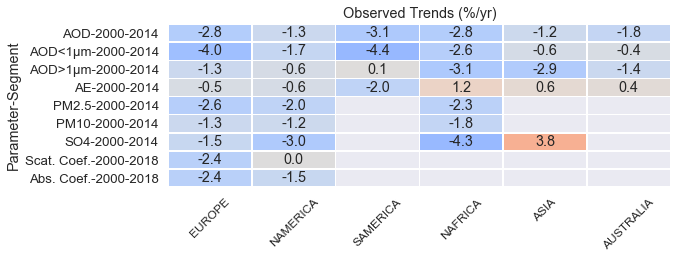

In [36]:
#generate a heatmap
plt.figure(figsize=(9,3))

hm = sns.heatmap(df_rslp, vmin=-10, vmax=10, center=0, cmap='coolwarm', 
            annot=True, fmt=".1f", linewidth=0.5, cbar=False,
            square=False
           )
plt.title('Observed Trends (%/yr)')
#fix xlabels
xlabs = hm.get_xticklabels()
hm.set_xticklabels(xlabs, rotation = 45, fontsize = 12)

In [37]:
rslp = df_rslp
pval = df_pval

#store rows order: index
cols = rslp.columns
rows = rslp.index

#remove Indexes so only have columns
rslp = rslp.reset_index()
pval = pval.reset_index()
rslp.tail()

xs, ys, rslps, pvals = [], [], [], []

#start extracting rlsps values
vals = rslp.values
columns = rslp.columns
for val in vals:
    parseg = val[0]
    data = val[1:]

    rslps.extend(data[:])
    xs.extend(columns[1:])
    ys.extend([parseg] * len(data))
rslps = np.array(rslps)

#then pval values
vals = pval.values
for val in vals:
    data = val[1:]
    pvals.extend(data[:])
pvals = np.array(pvals)

#sizes matrice: opposite to pvalue
sizes = []
for i, pv in enumerate(pvals):
    if np.isnan(rslps[i]):
        size = 0
    else:
        size = pval2size(pv)
    sizes.append(size)

#if nan rslp, set it to 99
rslps[np.isnan(rslps)]=0

#calculate represnetativity
repres = REPR['Representativity']
rep = []
for i, _ in enumerate(ys):
    region = xs[i]
    param = ys[i].split('-',1)[0]
    period = '2000-2014' #the representativity study us done for 2000-2014 only . #ys[i].split('-',1)[1]
    if param in repres and region in repres[param] and period in repres[param][region]:
        rep.append(repres[param][region][period])
    else:
        rep.append(0)
        
#break years
break_years, print_years = [], []
for i, _ in enumerate(ys):
    region = xs[i]
    param = ys[i].split('-',1)[0]
    per = ys[i].split('-',1)[1]
    break_year = per.split('-')[0]
    if rslps[i]!=0 and int(break_year) != int(period.split('-')[0]) and param+region not in print_years:
        break_years.append(break_year)
        print_years.append(param+region)
    else:
        break_years.append('')

/home/augustinm/anaconda3/envs/pya/lib/python3.7/site-packages/ipykernel_launcher.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


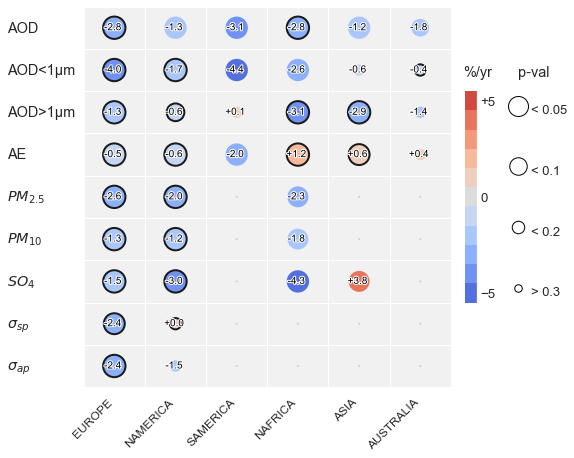

In [38]:
heatmap(
    x=xs,
    y=ys,
    group_segments=True,
    size=sizes,
    color=rslps,
    marker='o',
    palette=sns.color_palette("coolwarm", 11),
    color_range=[-5,5],
    x_order=cols,
    y_order=rows[::-1],
    title='',
    annotate=True,
    colorbar=True,
    obs=True,
    repres=rep,
    merge_ylabels=True,
    x_ylabels=-3,
    break_year=break_years
)
ax = plt.gca()

#fix xlabels
xlabs = ax.get_xticklabels()
ax.set_xticklabels(xlabs, rotation = 45, fontsize = 12)

#change size of the figure
fig = plt.gcf()
fig.set_size_inches(8, 7)
plt.savefig('figs/heatmaps/OBS.png', dpi=300, bbox_inches='tight')

#### heatmap of bars

In [39]:
def plot_bars(ax, rslp, parameter, region, err={}, pval={}):
    
    sources = list(rslp.keys())
    #get only sources where at least one trend is valid
    sources = [source for source in sources if not np.isnan(np.nanmean(rslp[source]))]
    
    bars, yerrs, colors, ecolors, pvals = [], [], [], [], []
    
    #plot a horizontal line at the zero value
    ax.axhline(y=0, ls='-', lw=1, color=(.5, .5, .5), alpha=.6)
    
    #for scat and abs, get the 2000-2018 trend
    if parameter in ['Scat. Coef.', 'Abs. Coef.']:
        period = '2000-2018'
    else:
        period = '2000-2014'
    
    for source in sources:
        if region in rslp[source][parameter] and period in rslp[source][parameter][region]:
            bar = rslp[source][parameter][region][period]
            pv = pval[source][parameter][region][period]
            colors.append(get_color2_mod(source,alpha=1))
            if source=='OBS':
                #plot a horizontal line at the observation level
                ax.axhline(y=bar, ls=':', lw=1, color=(.5, .5, .5), alpha=.6)
            if region in err[source][parameter]:
                yerr = err[source][parameter][region][period]
                #ecolors does not work like colors: need to have only colors for valid values
                if not np.isnan(yerr):
                    ecolors.append(get_color2_mod(source, alpha=0.5))
                    
            else:
                yerr = np.nan
            bars.append(bar)
            yerrs.append(yerr)
            pvals.append(pv)
            
    xs, grp, x = [], '', 0
    all_mods = get_all_mods()
    dx = 0.5
    for source in sources:
        if source!='OBS' and all_mods[source]['group']!= grp:
            x += dx
            grp = all_mods[source]['group']
        x += 1
        xs.append(x)

    if len(bars)>0:
        ax.bar(xs, bars, yerr=yerrs, ecolor='white', color=colors)
        ax.bar(xs, bars, yerr=yerrs, ecolor=ecolors, color=colors)
        
    
    #add value
    ytxt = 5
    for i, bar in enumerate(bars):
        if not np.isnan(bar):
            if pvals[i]<=0.1:
                fw = 'bold'
            else:
                fw = 'normal'
            txt = ax.text(xs[i], -np.sign(bar)*ytxt, '{:+3.1f}'.format(bar), horizontalalignment='center', verticalalignment='center',
                    transform=ax.transData, fontsize=10, zorder=100, color=colors[i], rotation = 90, fontweight=fw
                   )
            txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    #set limits
    ax.set_ylim(-10,10)
    ax.set_xlim(0,xs[-1]+1)
    
    #setbackground color
    ax.set_facecolor('#F1F1F1')
    
    #grid
    ax.grid(False)
    ax.grid(True, which='major', axis='both')
    ax.set_xticks([])
    ax.set_yticks(np.arange(-10,10+1,2))
    ytls = np.arange(-10,10+1,2)
    ax.set_yticklabels([ytl if ytl in [-10,0,10] else '' for ytl in ytls])
    
    
    return bars, yerrs, colors, ecolors

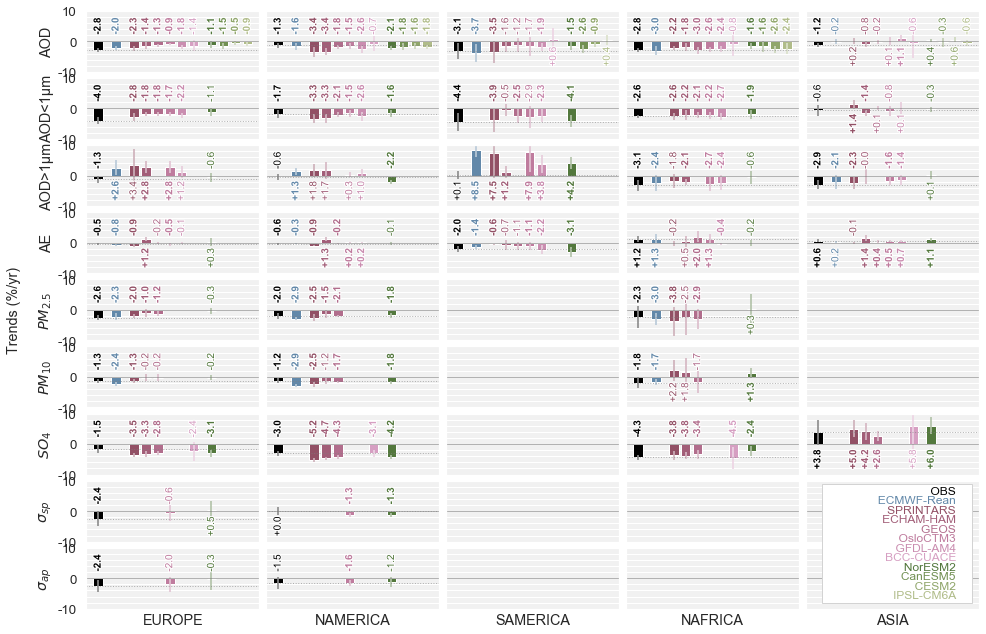

In [40]:
regions = ['EUROPE', 'NAMERICA', 'SAMERICA', 'NAFRICA', 'ASIA']
parameters = ['AOD', 'AOD<1µm', 'AOD>1µm', 'AE', 'PM2.5', 'PM10', 'SO4', 'Scat. Coef.', 'Abs. Coef.']


fig, axs = plt.subplots(len(parameters),len(regions), sharex='col', sharey='row',
                       gridspec_kw={
                           'wspace': 0.04,
                           'hspace': 0.1
                       })

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

il, ic = 0, 0
for il, parameter in enumerate(parameters):
    for ic, region in enumerate(regions):
        ax = axs[il, ic]
        #ax.set_title(parameter+region)
        bars, yerrs, colors, ecolors = plot_bars(ax, RSLP, parameter, region, err=ERR, pval=PVAL)
        #plot labels
        if ic==0:
            labp = parameter
            if labp=='PM2.5':
                labp = '$PM_{2.5}$'
            if labp=='PM10':
                labp = '$PM_{10}$'
            if labp=='SO4':
                labp = '$SO_{4}$'
            if labp=='Scat. Coef.':
                labp = '$\sigma_{sp}$'
            if labp=='Abs. Coef.':
                labp = '$\sigma_{ap}$'
            
            ax.set_ylabel(labp, fontweight='normal')
        if il==len(parameters)-1:
            ax.set_xlabel(region, fontweight='normal')

#change size of the figure
# hide tick and tick label of the big axes
plt.tick_params(labelcolor=None, top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xticks([])
plt.yticks([])


#add legend with model names
x0, y0 = 0.88, 0.27
dy = 0.012
sources = ['OBS']
sources.extend(all_mods)
ly0 = 0.6
grp = ''
for i, source in enumerate(sources):
    if source!='OBS':
        txt = get_all_mods()[source]['name']
    else:
        txt = 'OBS'
    plt.gcf().text(x0,y0-i*dy,'{:>20}'.format(txt),color=get_color2_mod(source),fontsize=12, ha='right', zorder=100, transform=fig.transFigure, figure=fig)

#draw filled rectangle below that
import matplotlib.patches as patches
width, height = 0.13, 0.15
fig.patches.extend([plt.Rectangle((1-width-0.106,0.1320),width,height,
                                  fill=True, ec='lightgray', fc='white', alpha=1, zorder=99,
                                  transform=fig.transFigure, figure=fig)])


#set ylabel for the plot
plt.ylabel('Trends (%/yr)',labelpad=65,fontweight='normal')

fx = 1.0
fig.set_size_inches(16*fx,16*fx)
fig = plt.gcf()
plt.savefig('figs/heatmaps/BARS.png', dpi=300, bbox_inches='tight')

fig.set_size_inches(16*fx,11*fx)
plt.savefig('figs/heatmaps/BARS-16x9.png', dpi=300, bbox_inches='tight')

### chosse palette

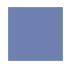

In [41]:
palette = sns.cubehelix_palette(1, start=0, rot=-.1, dark=.4, light=.5, reverse=True)
sns.palplot(palette)

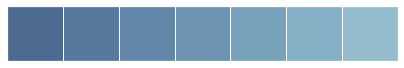

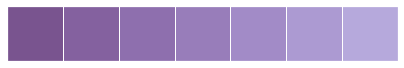

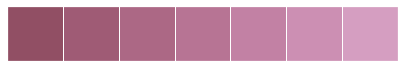

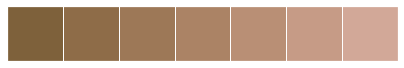

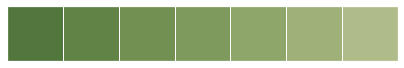

In [42]:
starts = np.arange(0,2.5,.5)
for start in starts:
    palette = sns.cubehelix_palette(7, start=start, rot=-.2, dark=.4, light=.7, reverse=True)
    sns.palplot(palette)

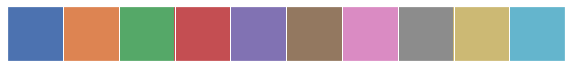

In [43]:
palette = sns.color_palette()
sns.palplot(palette)

In [44]:
for i in [0,1,2]:
    print([255*palette[i][ncol] for ncol in [0,1,2]])

[76.0, 114.0, 176.0]
[221.0, 132.0, 82.0]
[85.0, 168.0, 104.0]


In [26]:
#palette0
palette0 = [(76.0, 114.0, 176.0)]
palette1 = [(242,210,191),(234,179,148),(226,149,106),(217,119,63),(192,93,38),(149,72,29),(107, 52, 21)]
palette2 = [(136,195,150),(103,178,120),(77,152,94)]

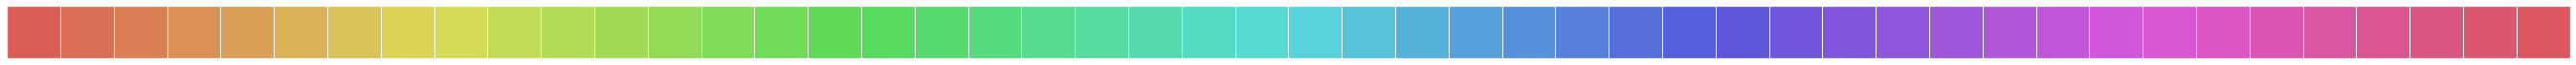

In [27]:
pal = sns.color_palette("hls", 48)
sns.palplot(pal)

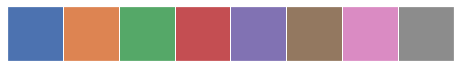

In [28]:
palette1 = [palette[i] for i in [0,1,2,3,4,5,6,7]]
sns.palplot(palette1)

In [29]:
palette2 = [palette[i] for i in [18,16,12]]
sns.palplot(palette2)

IndexError: list index out of range

### Other stuff

In [ ]:
'''
columns = [col for col in list(RSLP.keys()) if col!='OBS']
RSLP['MOD_mean'] = RSLP[columns].mean(axis=1)
RSLP['MOD_std'] = RSLP[columns].std(axis=1)

rslp = RSLP[['OBS','MOD_mean','MOD_std']]
rslp['OBS_err'] = ERR['OBS']
rslp

print(rslp.to_latex())
'''

### print out statistics for model groups

In [ ]:
def get_models_group(group):
    all_mods = get_all_mods()
    models_group = []
    for mod in all_mods:
        if all_mods[mod]['group'] == group:
            models_group.append(mod)
    return models_group

In [ ]:
grps = ['OBS', 'CAMS-Rean', 'AP3', 'CMIP6']
RSLPS = {}

for param in parameters:
    RSLPS[param] = {}
    for region in regions:
        RSLPS[param][region] = {}
        for grp in grps:
            rslps = []
            if grp=='OBS':
                keys = [grp]
            else:
                keys = get_models_group(grp)
            for key in keys:
                if region in RSLP[key][param]:
                    #take the period whatever it is
                    period = list(RSLP[key][param][region].keys())[0]
                    rslps.append(RSLP[key][param][region][period])
            RSLPS[param][region][grp] = float('{:3.2f}'.format(np.nanmean(rslps)))

In [ ]:
dict_of_df = {k: pd.DataFrame(v) for k,v in RSLPS.items()}
df = pd.concat(dict_of_df, axis=1)
df = df.transpose()

In [ ]:
df

In [ ]:
#dataframe that is cmade with trends differences

In [ ]:
diff = {}
for grp in grps:
    if grp!='OBS':
        diff[grp] = df[grp].subtract(df['OBS'])
        
mean = {}
for grp in grps:
    mean[grp] = df[grp]


In [ ]:
df['OBS']

In [ ]:
df2 = pd.DataFrame(diff)

In [ ]:
#make a 3*3 figure
nl, nc = 3, 3
fig, axs = plt.subplots(nl, nc, sharex='col', sharey=False)
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
il, ic = 0, 0

for param in parameters:
    df3 = df.loc[param]

    #get current axes
    ax = axs[il, ic]
    
    hm = sns.heatmap(df3, vmin=-5, vmax=5, center=0, cmap='coolwarm', 
                    annot=True, fmt=".1f", linewidth=0.5, cbar=True,
                    square=False, yticklabels=True, ax=ax,
                   )
    ax.set_title(param, fontweight='bold')
    
    #hide axis for columns>0
    if ic>0:
        ax.set_yticks([])
    #set next axis
    if ic<nc-1:
        ic+=1
    else:
        il+=1
        ic=0

#change size of the figure
# hide tick and tick label of the big axes
plt.tick_params(labelcolor=None, top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xticks([])
plt.yticks([])

#set ylabel for the plot
plt.title('Trends (%/yr)',pad=30)

fx = .7
fig.set_size_inches(16*fx,16*fx)

### errors on OBS trends

In [ ]:
for param in parameters:
    print('==================')
    print(param)
    print('==================')
    print(ERR.loc[param]['OBS'])

In [ ]:
REPR

In [ ]:
RSLP['OBS'].to_json('./obs_trends.json')

In [ ]:
rslp  = RSLP['OBS']
rslp = rslp.reset_index()
rslp = rslp.drop(columns='Segment')
#new indexes
idx = []
for i, row in rslp.iterrows(): 
    idx.append(row['Parameter']+'-'+row['Region'])
rslp['idx'] = idx
rslp = rslp.set_index('idx')
rslp = rslp.drop(columns=['Parameter','Region'])
rslp.to_json('obs_trends.json')

#### Representativity table

In [ ]:
REPR